<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_13_FitDistribucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Introducción a la estadística, Ajuste de distribuciones 

1. Generar N datos asociados a una distribución normal empleando la libreria random de numpy.

2. Construya un histograma con los datos de la distribución 

Centro en -39.96367245603065
Desviación estándar = 1.4781395575332434


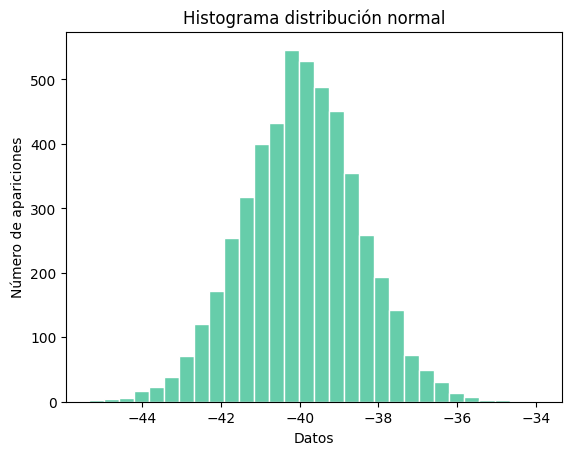

In [ ]:
#@title **Gráfico de una distribución normal**

centro = float(100*np.random.random(1) -100)  #Un número aleatorio entre -100 y 100
desvest = float(5*np.random.random(1))        #Un número aleatorio entre 0 y 5
N = 5000


#Datos obtenidos de la función random.normal de numpy que retorna números aleatorios
#con una distribución Gaussiana y que recibe el valor en el que se centra, la desviación estándar y el número de datos
data = np.random.normal(centro, desvest, N)

print(f'Centro en {centro}\nDesviación estándar = {desvest}')


#Graficación
fig, ax = plt.subplots()
ax.hist(data, bins=30, color="mediumaquamarine",edgecolor='white')

plt.title('Histograma distribución normal')
plt.xlabel("Datos")
plt.ylabel("Número de apariciones");

3. Con la libreria stat de scipy realizar un fit a la distribucion normal que se generó con los números aleatorios, utilizar el metodo fit dentro de la libreria de stat.

In [ ]:
from scipy import stats

Media: -39.95384885731873
Desviación estándar: 1.4740643026501805


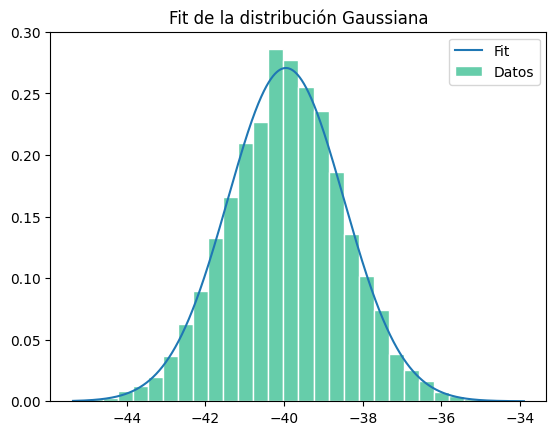

In [ ]:
media, desviacion = stats.norm.fit(data)
print(f'Media: {media}')
print(f'Desviación estándar: {desviacion}')

#Fit
params = stats.norm.fit(data)
dominiox = np.linspace(min(data), max(data), N)
fit = stats.norm.pdf(dominiox,*params)


plt.title('Fit de la distribución Gaussiana')
plt.plot(dominiox, fit, label='Fit')
plt.hist(data, bins=30, color="mediumaquamarine",edgecolor='white', density=True, label='Datos')
plt.legend();

4. Cuando no conocemos la distribución de datos, es recomendable buscar la mejor distribucion estadistica posible, supogamos que queremos analizar el mejor fit de multiples  distribuciones estadisticas, asi que podemos emplear la libreria Fitter para buscar la mejor distribución cuando determinados el error cuadratico medio, como sigue: 


```
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria, que podemos emplear para realizar ajustes mas generalizados.

Realizar un fit con la distribucion gamma, lognorm, beta, norm para la distribución de datos estadísticos. Ahora que ya sabes cual es la mejor, emplea la libreria stat para realizar nuevamente el fit, de esta manera puedes usar todos los metodos de la libreria stat.



In [ ]:
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=9362b09173139d61fc9a08cfa9bb285d1037ca70aff02943b37f1c507e9eea8b
  Stored in directory: /root/.cache/pip/wheels/eb/50/1d/6d8762c6a9a50d3668e53f98164ba13ca314827fb5ac7ebeaa
Successfully built fitter


Fitting 5 distributions: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


(1190437.7683255048,
 4630.9657831279355,
 -25877.985914018805,
 25938.54554662954)

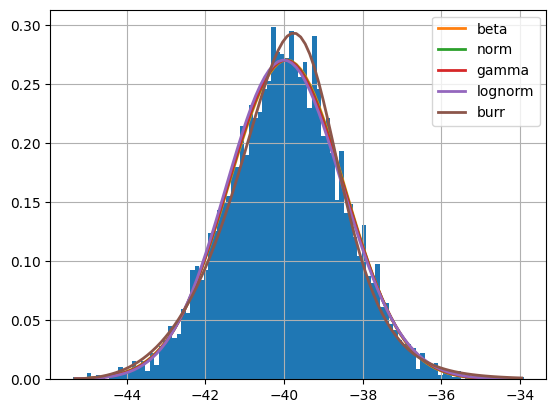

In [ ]:
f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])

f.fit()
f.summary()

# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')

# Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

Fitting 110 distributions:  39%|███▉      | 43/110 [00:35<00:33,  1.99it/s]/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3485: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 110 distributions:  40%|████      | 44/110 [00:41<01:42,  1.55s/it]/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3485: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 110 distributions:  90%|█████████ | 99/110 [02:58<00:25,  2.29s/it]/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yield

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr12,0.011853,755.802284,-64727.665895,inf,0.005767,0.996011
genhyperbolic,0.011880,759.740148,-64707.987387,inf,0.963477,0.000000
gennorm,0.011906,761.573404,-64714.137503,inf,0.008112,0.894451
norminvgauss,0.011970,762.254149,-64678.603992,inf,0.008330,0.875476
johnsonsu,0.011979,762.286140,-64674.835734,inf,0.008393,0.869814


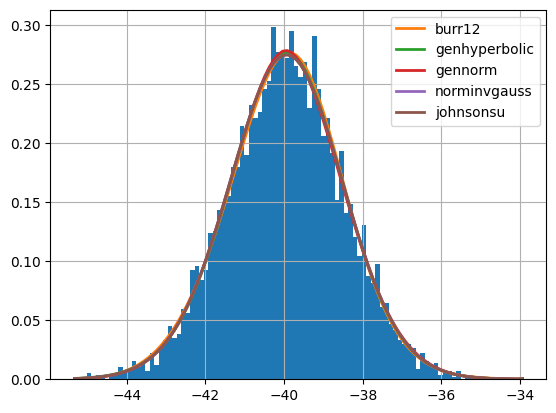

In [ ]:
from fitter import Fitter
f = Fitter(data)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

5. Ahora que ya sambemos realizar un fit de distribuciones estadístiscas con datos sinténticos, vamos a la práctica de un problema real.

Los archivos pdf, puede ser binarizados, un ejemplo de archivo binario es dado en el siguiente [link](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Actividades_clase/binary.txt).  Analicemos la distribucion estadistica de los datos, de la siguiente manera:

a. Realizar la lectura del archivo binario 
b. Agrupar los datos del pdf en grupos de 2, 3, 4, 5, 6, 7, 8 bit. Asociar un entero a cada uno de los bit, agrupando de la siguiente forma:

Supongamos que x es el archibo pdf representado de la siguiente forma 

x = "0111001011111101010101010101"

Para la agrupacion de 2, 3, 4, 5, 6, n bit, podemos agrupar los datos de a dos, de forma consecutiva, o en grupos de a 2 sin repetición. 
  1. Ejemplo de  agrupacion sin repeticion de 2 bit  
    - Una posible agrupacion de 2 bit es : {"01","11","10"...}
    - Una posible agrupacion de 3 bit es : {"011","100","10"...}
  
  2. Agrupacion con repetecion de a 2 bit:
    - Una posible agrupacion de 2 bit es : {"01","11","11"...}
    - Una posible agrupacion de 3 bit es : {"011","111","110"...}


Agrupando de cualquiera de las dos formas, podemos generar una lista de números enteros, asociado a cada número binario, y con ello construir un histogramas. 


c. Constriur histogramas para la forma 1 de agrupación, para 2, 3, 4, 5, 6, 7, 8 bit.


d. realizar un fit para cada unas de las distribuciones estadisticas.



Ayuda:

- De la siguiente forma se puede agrupar los datos y asociar el valor entero agrupando de la forma 1. 

```python 
import textwrap

a = "10110101010101"

bin_string = a
bin_string = bin(int(bin_string, 2))[2:]
split = 2
s = textwrap.wrap(bin_string,2)

#Entero ascoiado 
b = int(s[0], 2)


```


- Una forma más avanzada de agrupar los datos con la funcion map, de programacion funcional, puede  es dada a continuación:

```python 
state="111111111"
List_binario = "".join(list(map(lambda x: str(x), state)))
split = 2
s = [list(state[i:i+split]) for i in range(0, len(state)-split+1)]
binario_grupos = ["".join (map (str, i)) for i in s]
```


